<img src="optuna.png" width="800" height="800">

In [ ]:
#Trial: a single execution of the objective function
# Study: optimization based on an objective function

In [14]:
%run 0.0.dependances.ipynb

In [2]:
X_train,X_test,y_train,y_test,target,data,cat_indicies= load_data()

creation de df_train
-->Done

identification des variables numériques et catégorielles 
-->Done

la cible est la colonne : 18
Colonnes catégorielles :  ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

Encodage des variables catégorielles avec Labelencoder
-->Done

préparation des données
-->Done

--> les indices des colonnes catégorielles sont :  [1, 3, 4, 5, 6, 7]
préparation des données avec Robustscaler
-->Done



In [3]:
train_dataset = cb.Pool(X_train,y_train)
test_dataset = cb.Pool(X_test,y_test)

## Essai 2

In [10]:
#V2

def objective_cat(trial):
    params = {
        'logging_level': 'Silent',  # Set to a specific value
        'random_seed': trial.suggest_float('random_seed', 1, 100, step=1),  # Explorer une série d'entiers
        'learning_rate': trial.suggest_float('learning_rate',0.001,0.1,),
        'depth': trial.suggest_int('depth', 3, 12),
        'iterations': trial.suggest_int('iterations',100, 400)
    }
    model_cat = CatBoostClassifier(**params)
    model_cat.fit(X_train, y_train)
    y_pred = model_cat.predict_proba(X_test)
    return log_loss(y_test, y_pred)

study_cat = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat.optimize(objective_cat, n_trials=50, show_progress_bar=True)

print("Best trial:")
trial = study_cat.best_trial
print("Value: {}".format(trial.value))
print("Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

  0%|          | 0/50 [00:00<?, ?it/s]

Best trial:
Value: 0.3536242666060361
Params: 
    random_seed: 26.0
    learning_rate: 0.084007819010894
    depth: 4
    iterations: 400


## Essai 3

In [15]:
#V3
study_cat = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat.optimize(objective_cat, n_trials=150, show_progress_bar=True)

print("Best trial:")
trial = study_cat.best_trial
print("Value: {}".format(trial.value))
print("Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

  0%|          | 0/150 [00:00<?, ?it/s]

Best trial:
Value: 0.35460686367167354
Params: 
    random_seed: 3.0
    learning_rate: 0.08691465982578393
    depth: 4
    iterations: 282


In [23]:
params= {'random_seed' : 3.0, 'learning_rate': 0.08691465982578393,
    'depth': 4, 'iterations': 282}
best_model = cb.CatBoostClassifier(**params)
best_model.fit(X_train, y_train)

0:	learn: 0.6408884	total: 2.45ms	remaining: 688ms
1:	learn: 0.6044799	total: 4.91ms	remaining: 687ms
2:	learn: 0.5685722	total: 7.18ms	remaining: 668ms
3:	learn: 0.5428794	total: 10ms	remaining: 696ms
4:	learn: 0.5189342	total: 12.4ms	remaining: 685ms
5:	learn: 0.5011913	total: 14.7ms	remaining: 678ms
6:	learn: 0.4838480	total: 17.1ms	remaining: 672ms
7:	learn: 0.4712167	total: 19.5ms	remaining: 668ms
8:	learn: 0.4609046	total: 21.7ms	remaining: 658ms
9:	learn: 0.4506137	total: 24ms	remaining: 654ms
10:	learn: 0.4432213	total: 26.4ms	remaining: 650ms
11:	learn: 0.4353084	total: 28.7ms	remaining: 646ms
12:	learn: 0.4292078	total: 31ms	remaining: 642ms
13:	learn: 0.4254487	total: 33.3ms	remaining: 637ms
14:	learn: 0.4203869	total: 35.8ms	remaining: 637ms
15:	learn: 0.4167032	total: 38.2ms	remaining: 634ms
16:	learn: 0.4134682	total: 40.3ms	remaining: 628ms
17:	learn: 0.4098643	total: 42.6ms	remaining: 625ms
18:	learn: 0.4070145	total: 45ms	remaining: 622ms
19:	learn: 0.4043471	total: 47

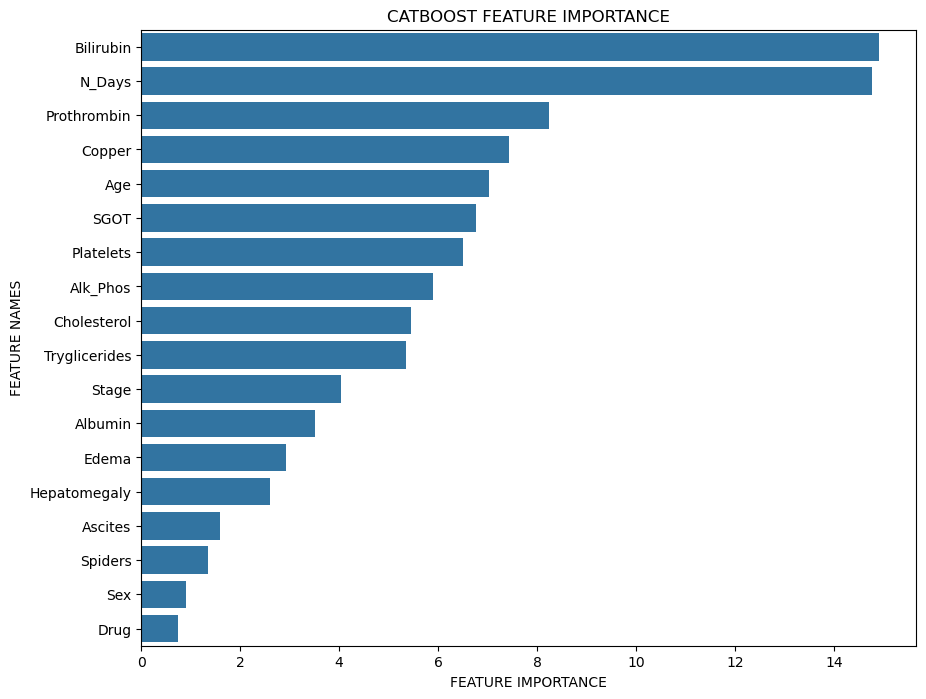

In [31]:
path = r"C:\Users\Frederic\Documents\GitHub\Tennis_analysis\Prediction-of-Cirrhosis-Outcomes"
train_path = os.path.abspath(path) + "/data" +"/train.csv"
df_train = pd.read_csv(train_path,index_col='id')
data = df_train.drop(columns=["Status"])
plot_feature_importance(best_model.get_feature_importance(),data.columns,'CATBOOST')